# Loan Default Prediction

#### Sources:
- https://www.kaggle.com/kmldas/loan-default-prediction
- https://www.kaggle.com/kmldas/beginner-s-guide-to-eda-financial-analytics

___

## EDA

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read in and examine data

In [2]:
data = pd.read_csv('Default_Fin.csv')

In [3]:
print(data.head())

   Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [5]:
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
data.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


#### Summary statistics observations:
- ~70% of loan customers are employed
- ~3% of customers defaulted on loans (low)
- very high annual salary (average of $402k)

### Feature Engineering
- we don't have any info on loan amounts, durations, interest rates, etc.
- basic assumption: customers with a higher salary and bank balance will have more resources to avoid default
- savings rate -- proportion of bank balance to annual salary
- reserve capacity -- my attempt to define the ability to finance a loan with both income and existing bank balance

In [7]:
# savings rate
data['Savings Rate'] = data['Bank Balance'] / data['Annual Salary']

# reserve capacity
data['Reserve Capacity'] = (data['Employed'] * np.sqrt(data['Savings Rate'])
                            * data['Annual Salary']) + (data['Bank Balance'] * 0.5)

### Visualizations

Text(0.5, 1.0, 'Reserve Capacity')

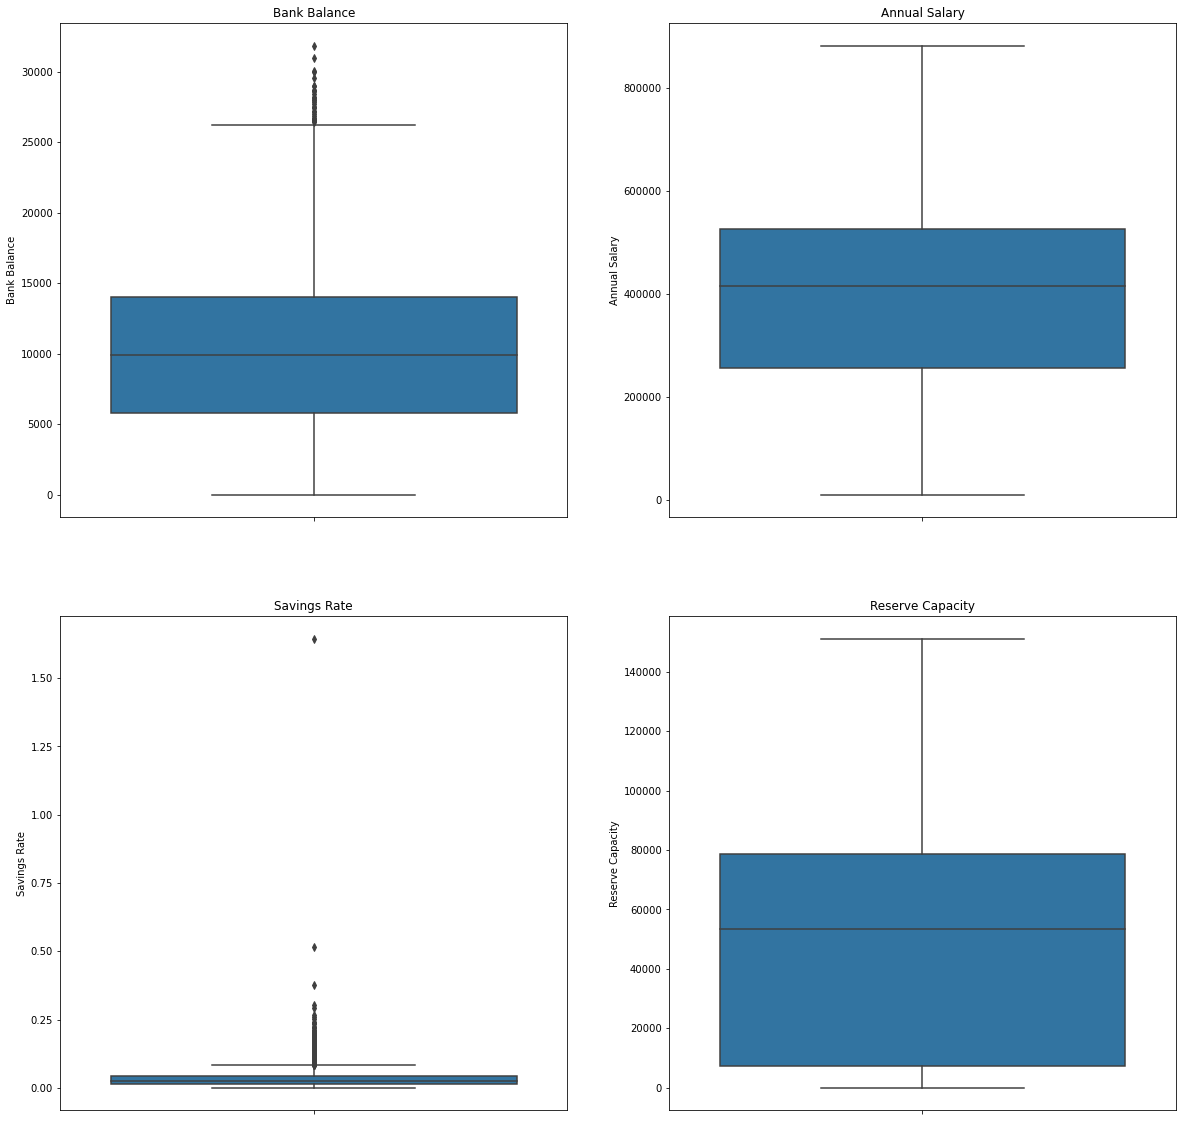

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(ax=axs[0, 0], y=data['Bank Balance'])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(ax=axs[0, 1], y=data['Annual Salary'])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(ax=axs[1, 0], y=data['Savings Rate'])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(ax=axs[1, 1], y=data['Reserve Capacity'])
axs[1, 1].set_title('Reserve Capacity')

Text(0.5, 1.0, 'Reserve Capacity')

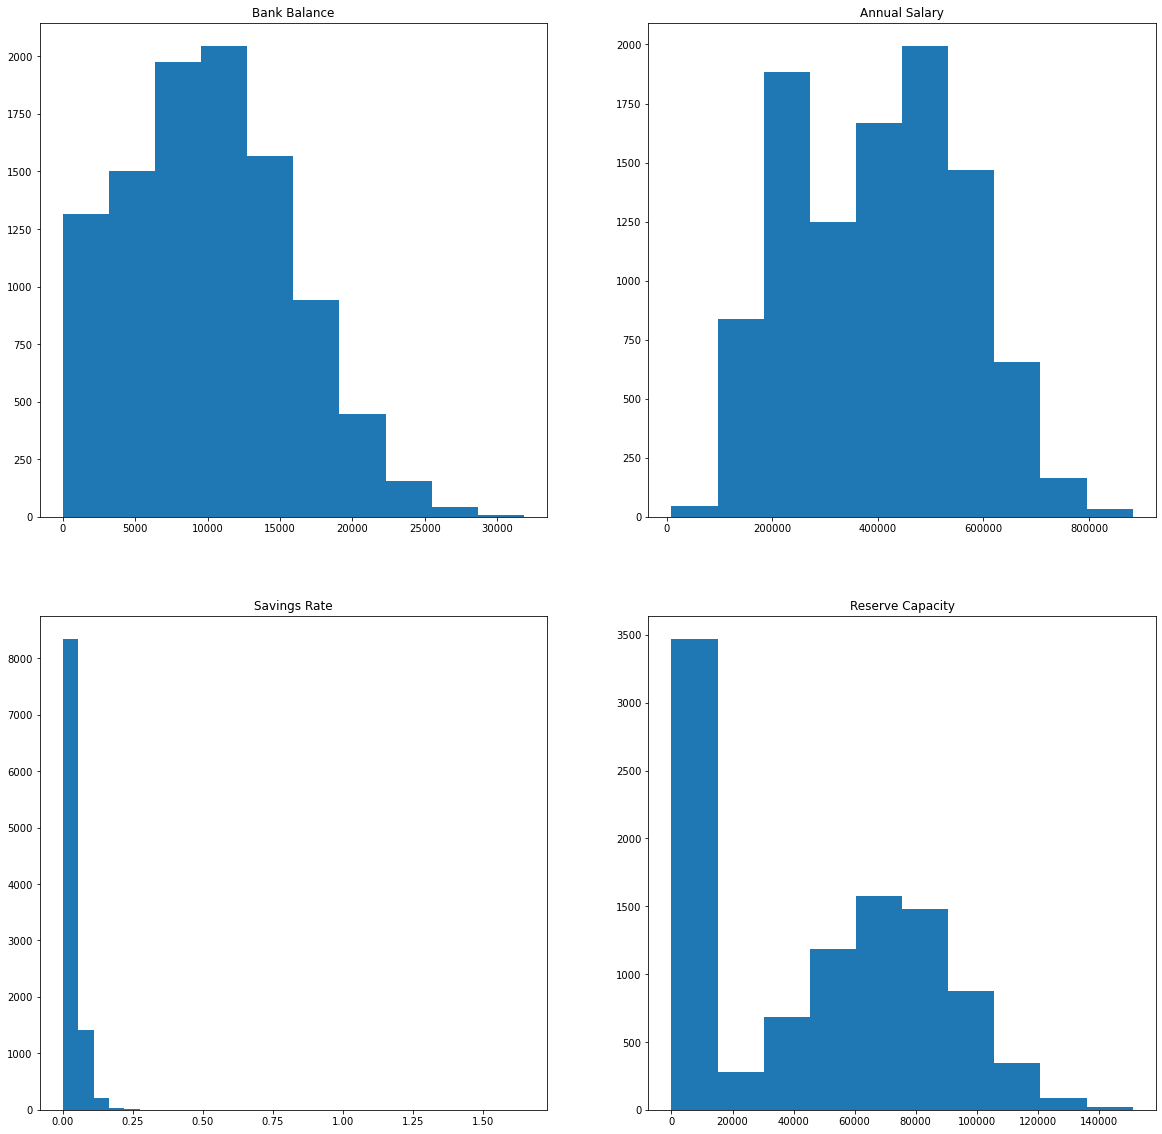

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
axs[0, 0].hist(data['Bank Balance'])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
axs[0, 1].hist(data['Annual Salary'])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
axs[1, 0].hist(data['Savings Rate'], bins=30)
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
axs[1, 1].hist(data['Reserve Capacity'])
axs[1, 1].set_title('Reserve Capacity')

C:\Users\jmfin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\jmfin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Defaulted?', ylabel='count'>

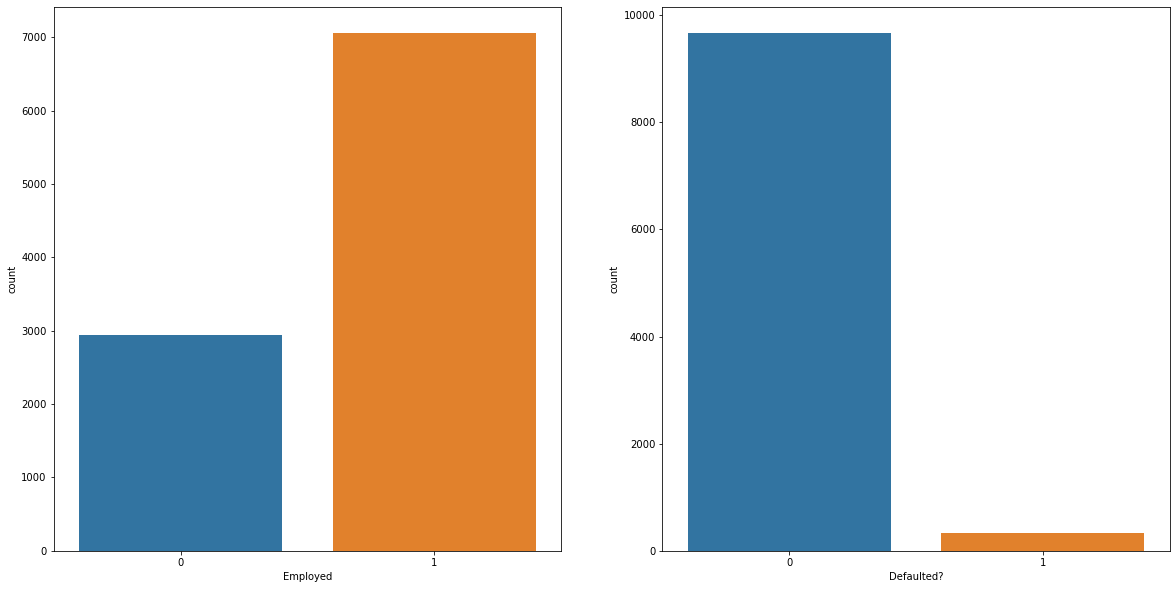

In [10]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(data['Employed'])

plt.subplot(1, 2, 2)
sns.countplot(data['Defaulted?'])

In [11]:
print('Total Employed vs. Unemployed: ')
display(data['Employed'].value_counts())

print('\nFraction Employed vs. Unemployed:')
data['Employed'].value_counts(normalize=True)

Total Employed vs. Unemployed: 


1    7056
0    2944
Name: Employed, dtype: int64


Fraction Employed vs. Unemployed:


1    0.7056
0    0.2944
Name: Employed, dtype: float64

In [12]:
print('Total Non-Defaulted vs. Defaulted: ')
display(data['Defaulted?'].value_counts())

print('\nFraction Non-Defaulted vs. Defaulted: ')
data['Defaulted?'].value_counts(normalize=True)

Total Non-Defaulted vs. Defaulted: 


0    9667
1     333
Name: Defaulted?, dtype: int64


Fraction Non-Defaulted vs. Defaulted: 


0    0.9667
1    0.0333
Name: Defaulted?, dtype: float64

Text(0.5, 1.0, 'Reserve Capacity')

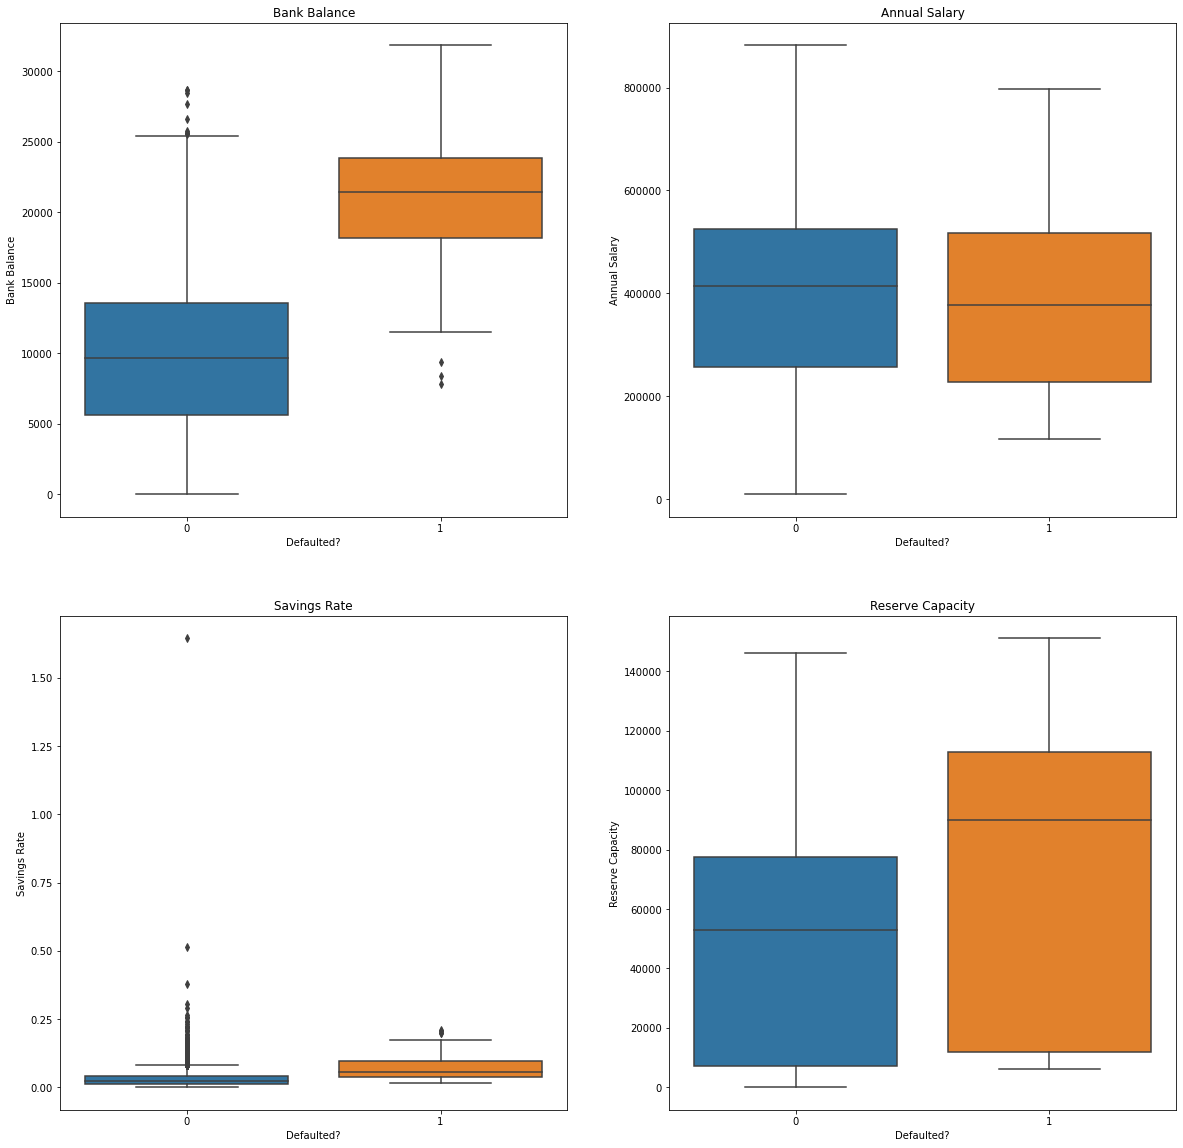

In [16]:
# plt.figure(figsize=(20,10))
# plt.subplot(1,2,1)
# sns.boxplot(data['Defaulted?'], data['Bank Balance'])

# plt.subplot(1,2,2)
# sns.boxplot(data['Defaulted?'], data['Annual Salary'])

fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Bank Balance
sns.boxplot(x=data['Defaulted?'], y=data['Bank Balance'], ax=axs[0, 0])
axs[0, 0].set_title('Bank Balance')

# Annual Salary
sns.boxplot(x=data['Defaulted?'], y=data['Annual Salary'], ax=axs[0, 1])
axs[0, 1].set_title('Annual Salary')

# Savings Rate
sns.boxplot(x=data['Defaulted?'], y=data['Savings Rate'], ax=axs[1, 0])
axs[1, 0].set_title('Savings Rate')

# Reserve Capacity
sns.boxplot(x=data['Defaulted?'], y=data['Reserve Capacity'], ax=axs[1, 1])
axs[1, 1].set_title('Reserve Capacity')

In [17]:
pd.crosstab(data['Employed'], data['Defaulted?'], normalize='index')

Defaulted?,0,1
Employed,,
0,0.956861,0.043139
1,0.970805,0.029195


Text(0.5, 1.0, 'Pearson Correlation of Features')

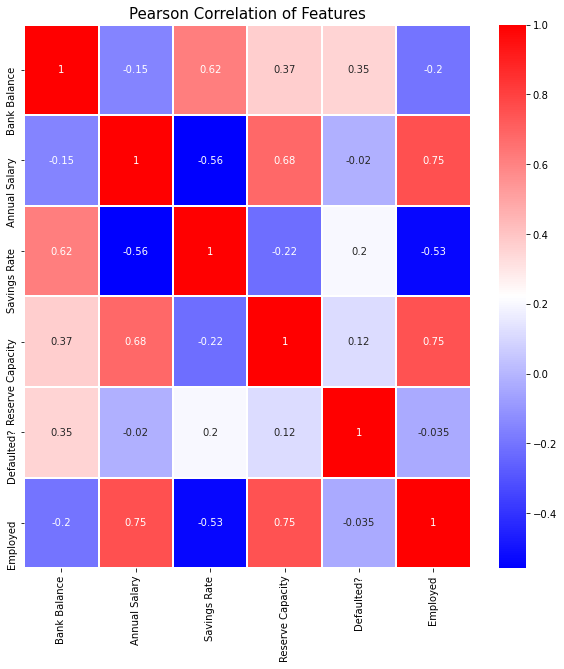

In [18]:
colormap = plt.cm.bwr
plt.figure(figsize=(10, 10))
sns.heatmap(data[['Bank Balance', 'Annual Salary', 'Savings Rate', 'Reserve Capacity', 'Defaulted?',
                  'Employed']].corr(), linewidths=0.1, vmax=1.0, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features', size=15)

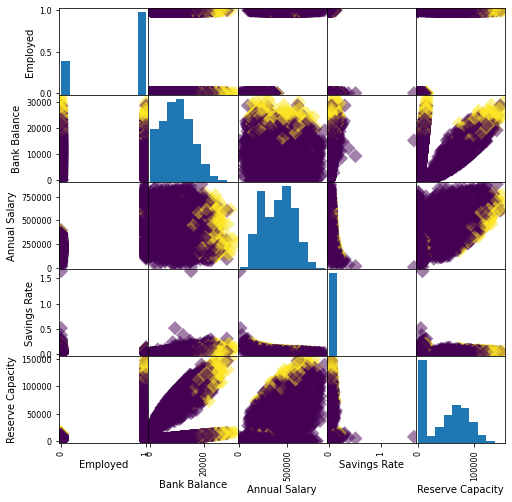

In [29]:
pd.plotting.scatter_matrix(
    data[['Employed', 'Bank Balance', 'Annual Salary',
          'Savings Rate', 'Reserve Capacity']], c=y, figsize=[8, 8], diagonal='hist', s=100, marker='D', alpha=0.5)
plt.show()

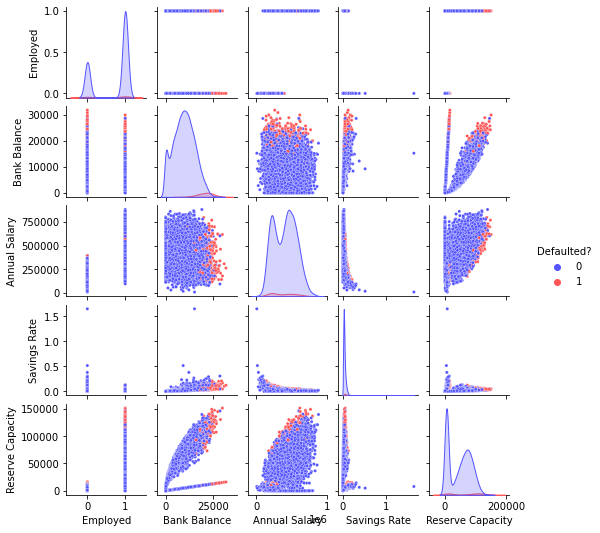

In [24]:
sns.pairplot(data[['Defaulted?', 'Employed', 'Bank Balance', 'Annual Salary', 'Savings Rate', 'Reserve Capacity']],
             hue='Defaulted?', palette='seismic', height=1.5,
             diag_kind='kde', plot_kws=dict(s=10))
# , diag_kws={'bw': 0.25}

### Models

In [53]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeCV, Lasso
from sklearn.metrics import roc_curve, roc_auc_score

#### Scale and Split data

In [32]:
# split into data and target
X = data[['Employed', 'Bank Balance', 'Annual Salary',
          'Savings Rate', 'Reserve Capacity']].values
y = data['Defaulted?'].values

In [33]:
X_scaled = scale(X)

In [34]:
print('Means before scaling: ', np.mean(X, axis=0))
print('Standard Deviations before scaling: ', np.std(X, axis=0))

Means before scaling:  [7.05600000e-01 1.00244985e+04 4.02203782e+05 3.24142563e-02
 4.82485806e+04]
Standard Deviations before scaling:  [4.55772575e-01 5.80428925e+03 1.60031673e+05 3.37551389e-02
 3.66241779e+04]


In [35]:
print('Means after scaling: ', np.mean(X_scaled, axis=0))
print('Standard Deviations after scaling: ', np.std(X_scaled, axis=0))

Means after scaling:  [-3.17967874e-17 -8.98836561e-17 -1.52411417e-16  1.50635060e-16
 -6.18172180e-17]
Standard Deviations after scaling:  [1. 1. 1. 1. 1.]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=0)

#### K Nearest Neighbors Model

In [39]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [40]:
knn.score(X_test, y_test)

0.968

In [41]:
knn.score(X_train, y_train)

0.9748333333333333

##### KNN Model Complexity Analysis

In [48]:
neighbors_range = np.linspace(1, 100, 100).astype(np.int)

In [49]:
test_scores = []
train_scores = []
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    test_score = knn.score(X_test, y_test)
    train_score = knn.score(X_train, y_train)
    test_scores.append(test_score)
    train_scores.append(train_score)

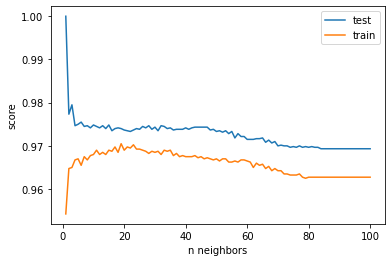

In [60]:
score_list = [neighbors_range, train_scores, test_scores]
scores = pd.DataFrame(score_list).transpose()
scores.columns = ['range', 'test', 'train']
plt.plot(scores['range'], scores['test'], label = 'test')
plt.plot(scores['range'], scores['train'], label = 'train')
plt.xlabel('n neighbors')
plt.ylabel('score')
plt.legend()
plt.show()

#### Ridge Regression Model

In [54]:
rrg = RidgeCV(alphas = [0.1, 1, 10])
rrg.fit()